In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import schur

# 1D QSAPs
Ref: [Bertin and Solon](https://arxiv.org/abs/2312.13963).

## Overdamped case
$$
\dot{x}_i = u(\tilde{\rho}) e_i(t) + \sqrt{2D}\xi_i(t).
$$


## Fully biased case with inertia
The particles are moving along the $+x$ direction, such that
$$
\begin{aligned}
\dot{x}_i &= v_i, \\
\dot{v}_i &= -\gamma \left[
    v_i - u(\tilde{\rho}(x_i))
\right] + \gamma \sqrt{2D}\xi_i(t),
\end{aligned}
$$
from which we get the Fokker-Planck equation for the distribution $f(x, v, t)$:
$$
\dot{f} + \partial_x (vf) - \gamma \partial_v [(v-u(\tilde{\rho}))f] = \gamma^2 D \partial_v^2 f.
$$

The corresponding continous equations read
$$
\begin{aligned}
\dot{\rho} &= -\partial_x w, \\
\dot{w} &= -\partial_x S - \gamma (w-\rho u)),\\
\dot{S} &= - 2\gamma(S-uw) + 2 \gamma^2 D \rho,
\end{aligned}
$$

Assuming $S=uw + \gamma D\rho$, the equation for $w$ becomes
$$
\dot{w} = -\partial_x (uw + \gamma D\rho ) - \gamma (w-\rho u))
$$
Linearizing the equations for $\rho$ and $w$, we find the growth rate $\lambda$ is the root of the equation
$$
\lambda^2 + (\gamma + iu_0 q) \lambda + (w_0 u' + \gamma D) q^2 + iq\gamma(\rho_0 u' + u_0) = 0,
$$
where $w_0=\rho_0 u_0$.

The condition for positive $\Re(\lambda)$ is
$$
\rho_0^2 (u')^2 > \gamma D.
$$

In [6]:
def get_lambda(q_arr, gamma, u_prime, D, rho0=1, u0=1):
    b = gamma + 1j * u0 * q_arr
    c = (u0 * rho0 * u_prime + gamma * D) * q_arr **2 + 1j * q_arr * gamma * (rho0 * u_prime + u0)
    Delta = b**2 - 4 * c
    root = 0.5 * (-b + np.sqrt(Delta))
    return root


def get_lambda2(q_arr, gamma, u_prime, D, rho0=1, u0=1):
    b = gamma - 1j * u0 * q_arr
    c = (u0 * rho0 * u_prime + gamma * D) * q_arr **2 - 1j * q_arr * gamma * (rho0 * u_prime + u0)
    Delta = b**2 - 4 * c
    root = 0.5 * (-b + np.sqrt(Delta))
    return root

gamma = 1
D = 2
u_prime = 2
print(get_lambda(1, gamma, u_prime, D))
print(get_lambda2(1, gamma, u_prime, D))


(0.09874475614751821-2.5877009563187325j)
(0.09874475614751821+2.5877009563187325j)


## Unbiased underdamped case
The probability densities to find a particle at position $x$ with velocity $v$ and direction $e_i=\pm 1$ are denoted as $f_\pm(x, v,t)$, which evolve according to
$$
\begin{aligned}
\partial_t f_+ + \partial_x (vf_+) - \gamma \partial_v [(v-u)f_+] &= \gamma^2 D \partial_v^2 f_+ - \alpha (f_+ - f_-), \\
\partial_t f_- + \partial_x (vf_-) - \gamma \partial_v [(v+u)f_-] &= \gamma^2 D \partial_v^2 f_- + \alpha (f_+ - f_-).
\end{aligned}
$$ 
Introducing $f=f_+ + f_-$, $g=f_--f_+$, we have


$$
\begin{aligned}
\partial_t f &= -\partial_x (vf) + \gamma \partial_v (vf) + \gamma \partial_v (ug) + \gamma^2 D\partial_v^2 f, \\
\partial_t g &= -\partial_x (vg) + \gamma \partial_v (vg) + \gamma \partial_v (uf) + \gamma^2 D\partial_v^2 g - 2\alpha g, 
\end{aligned}
$$


$$
\begin{aligned}
\partial_t \rho &= -\partial_x w, \\
\partial_t \bar{\rho} &= -\partial_x \bar{w} - 2\alpha \bar{\rho},
\end{aligned}
$$

$$
\begin{aligned}
\partial_t w &= -\partial_x S - \gamma(w + u\bar{\rho}), \\
\partial_t \bar{w} &= -\partial_x \bar{S} - \gamma(\bar{w} + u\rho) - 2\alpha \bar{w}, 
\end{aligned}
$$

$$
\begin{aligned}
\partial_t S &=  -2 \gamma S - 2\gamma u\bar{w} + 2\gamma^2 D \rho, \\
\partial_t \bar{S} &= -2\gamma \bar{S} - 2\gamma u w + 2\gamma^2 D\bar{\rho} - 2\alpha \bar{S}.
\end{aligned}
$$

Assuming $\partial_t S = \partial_t \bar{S} = 0$, we get
$$
\begin{aligned}
S &= -u\bar{w} + \gamma D\rho, \\
\bar{S} &= \frac{\gamma}{\gamma + \alpha} (-uw + \gamma D\bar{\rho}).
\end{aligned}
$$

For the $\alpha=0$ case, if we further enslave $w$ and $\bar{w}$ to $\rho$ and $\bar{\rho}$, we get
$$
\begin{aligned}
\partial_t \rho &= \partial_x^2 (u^2\rho/\gamma + D\rho) + \partial_x (u\bar{\rho}), \\
\partial_t \bar{\rho} &= \partial_x^2 (u^2 \bar{\rho}/\gamma+D\bar{\rho}) + \partial_x (u\rho).
\end{aligned}
$$
Around the homogenous state $(\rho, \bar{\rho}) = (\rho_0, 0)$, the growth rate reads
$$
\lambda_\pm = -(D+\tau u_0 (u_0 + \rho_0 u')) \pm \sqrt{(\tau u_0 u' \rho_0)^2 - u_0 (u_0 +\rho_0 u')}
$$
If $u' > 0$, we get $\lambda_+ < -(D + \tau u_0^2) < 0$, making it impossible to find instability for this case.

Keeping the first moment in $v$ of the distribution $f$ and $g$, we get
$$
\begin{aligned}
\partial_t \rho &= -\partial_x w, \\
\partial_t \bar{\rho} &= -\partial_x \bar{w} - 2\alpha \bar{\rho}, \\
\partial_t w &= -\partial_x (-u\bar{w}+\gamma D\rho) - \gamma(w + u\bar{\rho}), \\
\partial_t \bar{w} &= -\partial_x (-u w + \gamma D\bar{\rho}) - \gamma(\bar{w} + u\rho) - 2\alpha \bar{w}.
\end{aligned}
$$

Around the homogenous state $(\rho, \bar{\rho}, w, \bar{w})=(\rho_0, 0, 0, -u_0 \rho_0)$, we get the linearized equations
$$
\begin{aligned}
\partial_t \delta \rho &= -\partial_x \delta w, \\
\partial_t \delta \bar{\rho} &= - 2\alpha \delta\bar{\rho} -\partial_x \delta \bar{w}  \\
\partial_t \delta w &= (\bar{w}_0 u' - \gamma D)\partial_x \delta \rho - \gamma u_0 \delta \bar{\rho} - \gamma \delta w + u_0\partial_x\delta \bar{w}, \\
\partial_t \delta \bar{w} &= -\gamma (u_0 + u'\rho_0)\delta \rho - \gamma D\partial_x \delta\bar{\rho} + u_0\partial_x \delta w - (\gamma+2\alpha) \delta \bar{w}.
\end{aligned}
$$

The grwoth rate is the eigen value of the matrix
$$
M=\begin{pmatrix}
0 & 0 & -iq &0 \\
0& -2\alpha &0 & -iq \\
iq(\bar{w}_0u'-\gamma D) & -\gamma u_0 & -\gamma & iq u_0 \\
-\gamma(u_0 + u' \rho_0) & -iq\gamma D & iqu_0 & -(\gamma + 2\alpha)
\end{pmatrix}
$$

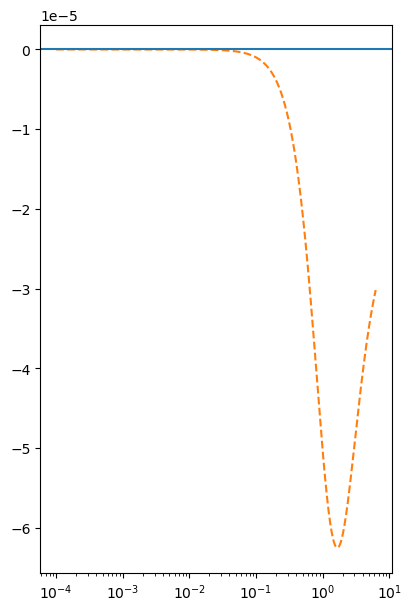

In [7]:
class DMatrix:
    def __init__(self, gamma, u_prime, D, alpha=0, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.alpha = alpha
        self.u0 = u0
        self.rho0 = rho0
        self.w0_bar = -u0 * rho0

    def get_M(self, q):
        M = np.zeros((4, 4), complex)
        M[0, 2] = -1j * q
        M[1, 1] = -2 * self.alpha
        M[1, 3] = -1j * q
        M[2, 0] = 1j * q * (self.w0_bar * self.u_prime - self.gamma * self.D)
        M[2, 1] = -self.gamma * self.u0
        M[2, 2] = -self.gamma
        M[2, 3] = 1j * q * self.u0
        M[3, 0] = -self.gamma * (self.u0 + self.u_prime * self.rho0)
        M[3, 1] = -1j * q * self.gamma * self.D
        M[3, 2] = 1j * q * self.u0
        M[3, 3] = -(self.gamma + 2 * self.alpha)
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real


gamma = 5
u_prime = 10
D = 0.0001
alpha = 0.

M = DMatrix(gamma, u_prime, D, alpha)
q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)


sigma = M.get_lambda_q(q_arr).max(axis=1)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), constrained_layout=True, sharex=True)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask], '--')
ax1.set_xscale("log")
ax1.axhline(0)


plt.show()
plt.close()

Around the homogenous phase $(\rho^+, w^+, \rho^-, w^-)=(\rho^+_0, w^+_0, \rho^-_0, w^-_0)$,
$$
\partial_t (\delta \rho^+, \delta w^+, \delta \rho^-, \delta w^-)^T = M (\delta \rho^+, \delta w^+, \delta \rho^-, \delta w^-)^T
$$
where $M$ reads
$$
M=\begin{pmatrix}
0 & -iq & 0 & 0 \\
-iq(w_0^+ u' + \gamma D) + \gamma(\rho_0^+ u' + u_0) & -iqu_0-\gamma  & -iq w_0^+ u' + \gamma \rho_0^+ u' & 0 \\
0 & 0 & 0 & iq \\
iq w_0^- u' + \gamma \rho_0^- u' & 0 & iq(w_0^- u' + \gamma D) + \gamma (\rho_0^- u' + u_0) & iq u_0 - \gamma
\end{pmatrix}
$$
Besides, $\rho_0^+ + \rho_0^- = \rho_0$, $w_0^\pm = u_0 \rho_0^\pm$.

[-9.52753705e-04-0.17342662j -9.52753705e-04+0.17342662j
 -9.99047246e-01+0.00441779j -9.99047246e-01-0.00441779j]
[ 0.03096417-0.28542078j -1.03096417+0.18542078j]


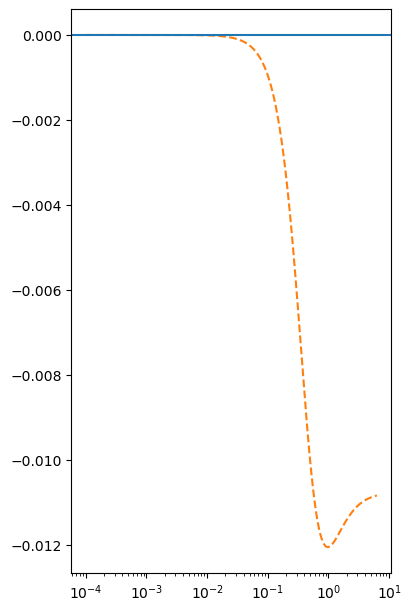

In [9]:
class DMatrix1:
    def __init__(self, gamma, u_prime, D, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0_p = rho0
        self.w0_p = self.rho0_p * u0
        self.rho0 = rho0
        self.w0_bar = -u0 * rho0

    def get_M(self, q):
        M = np.zeros((2, 2), complex)
        M[0, 1] = -1j * q
        M[1, 0] = -1j * q * (self.w0_p * self.u_prime + self.gamma * self.D) + self.gamma * (self.rho0_p * self.u_prime + self.u0)
        M[1, 1] = -1j * q * self.u0 - self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real

class DMatrix2:
    def __init__(self, gamma, u_prime, D, rho0_plus, u0=1, rho0=1):
        self.gamma = gamma
        self.u_prime = u_prime
        self.D = D
        self.u0 = u0
        self.rho0_p = rho0_plus
        self.rho0_m = rho0 - rho0_plus
        self.w0_p = self.rho0_p * u0
        self.w0_m = self.rho0_m * u0
        self.rho0 = rho0

    def get_M(self, q):
        M = np.zeros((4, 4), complex)
        M[0, 1] = -1j * q
        M[1, 0] = -1j * q * (self.w0_p * self.u_prime + self.gamma * self.D) + self.gamma * (self.rho0_p * self.u_prime + self.u0)
        M[1, 1] = -1j * q * self.u0 - self.gamma
        M[1, 2] = -1j * q * self.w0_p * self.u_prime + self.gamma * self.rho0_p * self.u_prime
        M[2, 3] = 1j * q
        M[3, 0] = 1j * q * self.w0_m * self.u_prime + self.gamma * self.rho0_m * self.u_prime
        M[3, 2] = 1j * q * (self.w0_m * self.u_prime + self.gamma * self.D) + self.gamma * (self.rho0_m * self.u_prime + self.u0)
        M[3, 3] = 1j * q * self.u0 - self.gamma
        return M
    
    def get_lambda(self, q):
        T, Z = schur(self.get_M(q), output="complex")
        eigen_values = np.array([T[0, 0], T[1, 1], T[2, 2], T[3, 3]])
        return eigen_values
    
    def get_lambda_q(self, q_arr):
        lambda_arr = np.array([self.get_lambda(q) for q in q_arr])
        return lambda_arr
    
    def get_max_lambda(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max()
    
    def get_lambda_max_lambda_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr)
        max_lambda = lambda_arr.max(axis=1)
        return max_lambda.max(), max_lambda[0].real

    def get_lambda_max_Re_Im_q0(self, q_arr):
        lambda_arr = self.get_lambda_q(q_arr).max(axis=1)
        max_Re_idx = lambda_arr.real.argmax()
        max_Im_idx = np.abs(lambda_arr.imag).argmax()
        max_Re = lambda_arr[max_Re_idx].real
        if lambda_arr[max_Im_idx].real > 0:
            max_Im = np.abs(lambda_arr[max_Im_idx].imag)
        else:
            max_Im = np.abs(lambda_arr[max_Re_idx].imag)
        return max_Re, max_Im, lambda_arr[0].real



gamma = 1
u_prime = 2
D = 0.1
rho0_plus = 0.5

M = DMatrix2(gamma, u_prime, D, rho0_plus)
print(M.get_lambda(0.1))

M1 = DMatrix1(gamma, u_prime, D)
print(M1.get_lambda(0.1))

q_arr = np.logspace(-4, np.log10(np.pi*2), 1000)
sigma = M.get_lambda_q(q_arr).max(axis=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), constrained_layout=True, sharex=True)
mask = np.abs(sigma.imag) < 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask])
mask = np.abs(sigma.imag) >= 1e-8
line, = ax1.plot(q_arr[mask], sigma.real[mask], '--')
ax1.set_xscale("log")
# ax1.set_yscale("log")

ax1.axhline(0)

plt.show()
plt.close()